In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [4]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [5]:
# Get basic information about the dataset
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [6]:
# Summary statistics of numerical columns
print(df.describe())

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


In [9]:
#finding null values...

print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [10]:
#deleting null values

df.dropna(inplace=True)

In [11]:
#checking how it went

print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [12]:
# Convert columns to appropriate data types
# For Reviews column, first handle values with 'M' (million) or 'K' (thousand)
def convert_to_number(x):
    if isinstance(x, str):
        if 'M' in x:
            return float(x.replace('M', '')) * 1000000
        elif 'K' in x:
            return float(x.replace('K', '')) * 1000
        else:
            return float(x)
    return x

# Apply the conversion function to Reviews column
df['Reviews'] = df['Reviews'].apply(convert_to_number).astype(int)

# Continue with other conversions
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# For Content Rating, make sure it's actually numeric before converting
# If it contains categories like "Everyone", "Teen", etc., don't convert to int
# If you're sure it should be numeric, you can uncomment the line below
# df['Content Rating'] = df['Content Rating'].astype(int)

In [13]:
#checking if it worked properly
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [14]:
#VISUALISATION

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


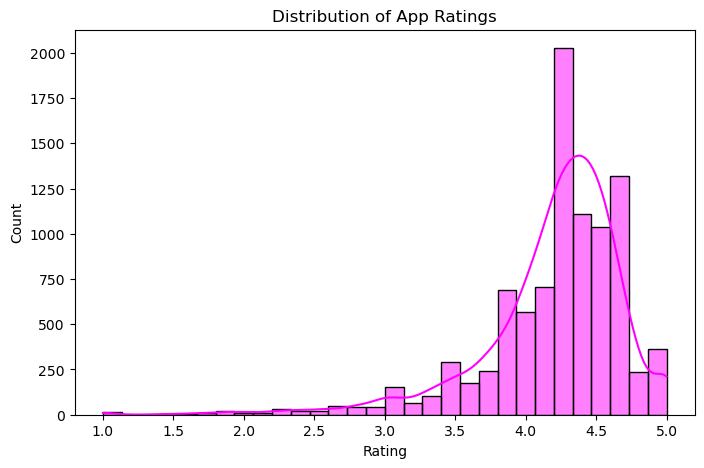

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=30, kde=True, color='magenta')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

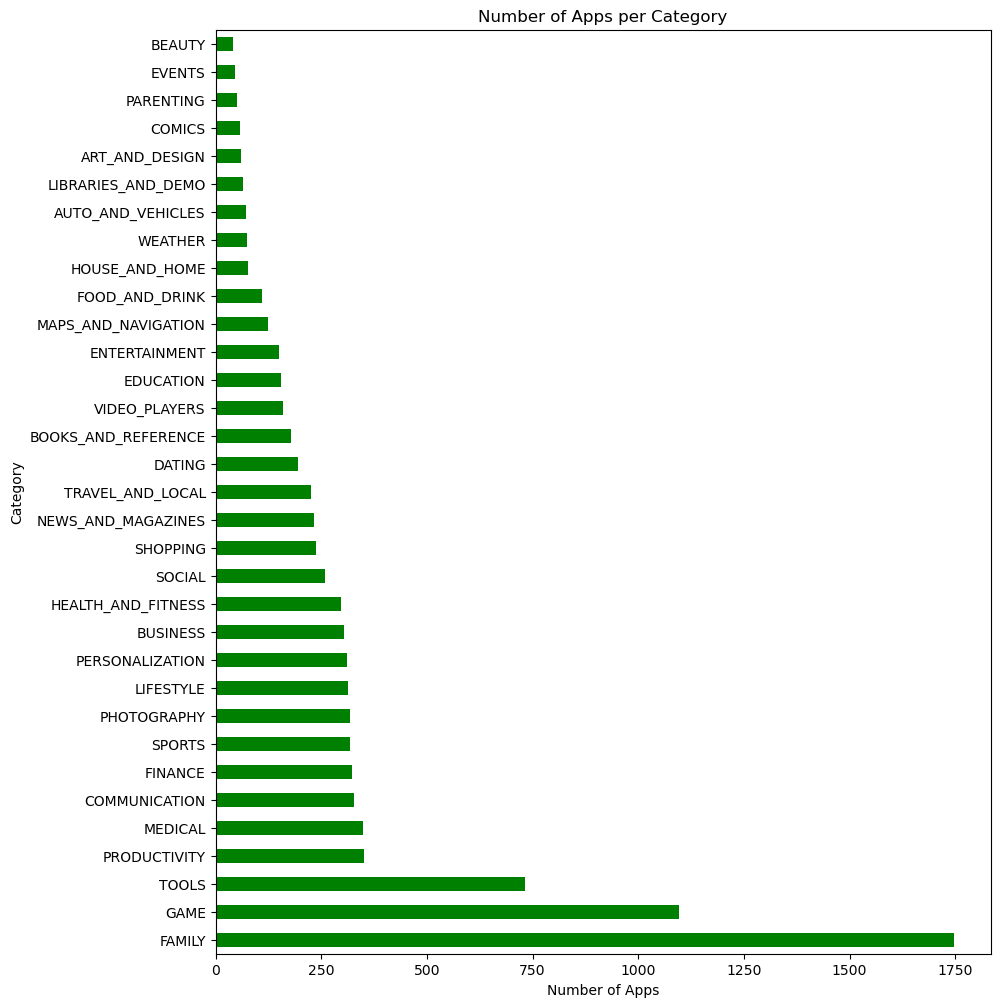

In [20]:
plt.figure(figsize=(10, 12))
df['Category'].value_counts().plot(kind='barh', facecolor='green')
plt.title('Number of Apps per Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


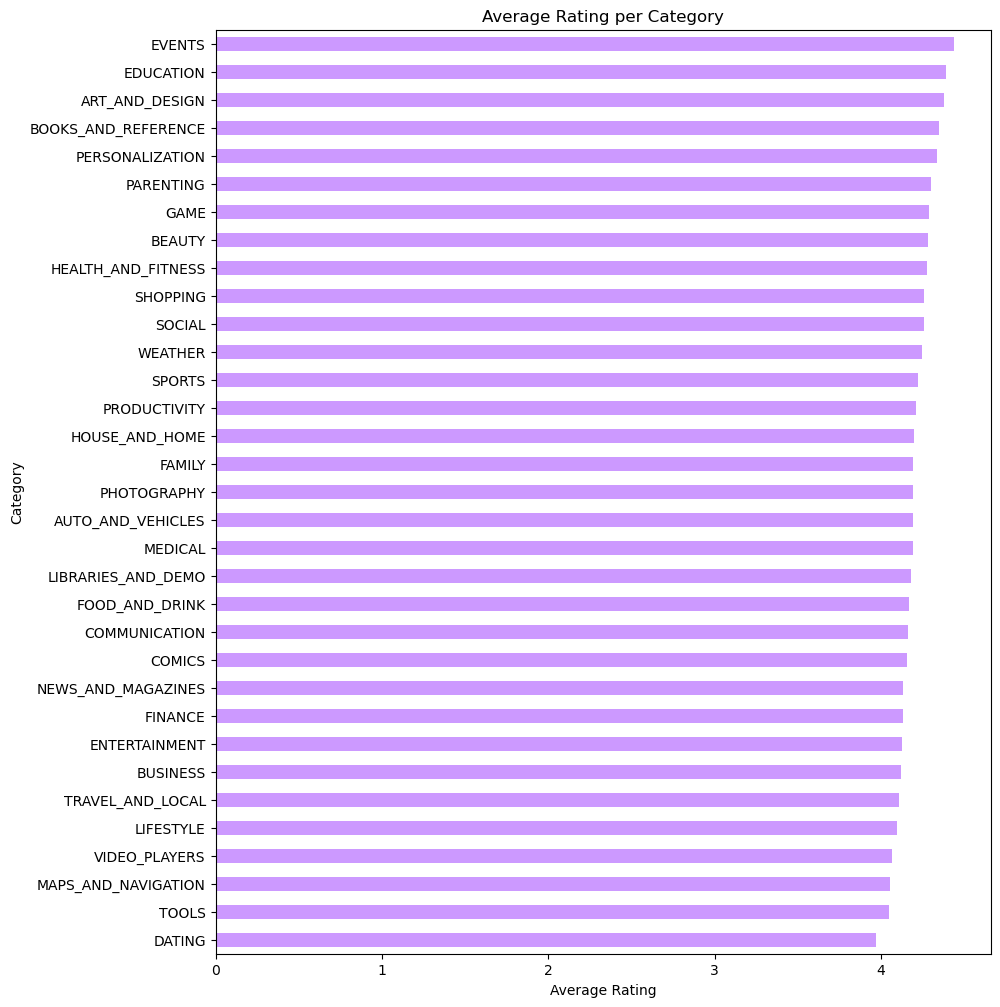

In [23]:
plt.figure(figsize=(10, 12))
df.groupby('Category')['Rating'].mean().sort_values().plot(kind='barh', color='#cc99ff')
plt.title('Average Rating per Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()


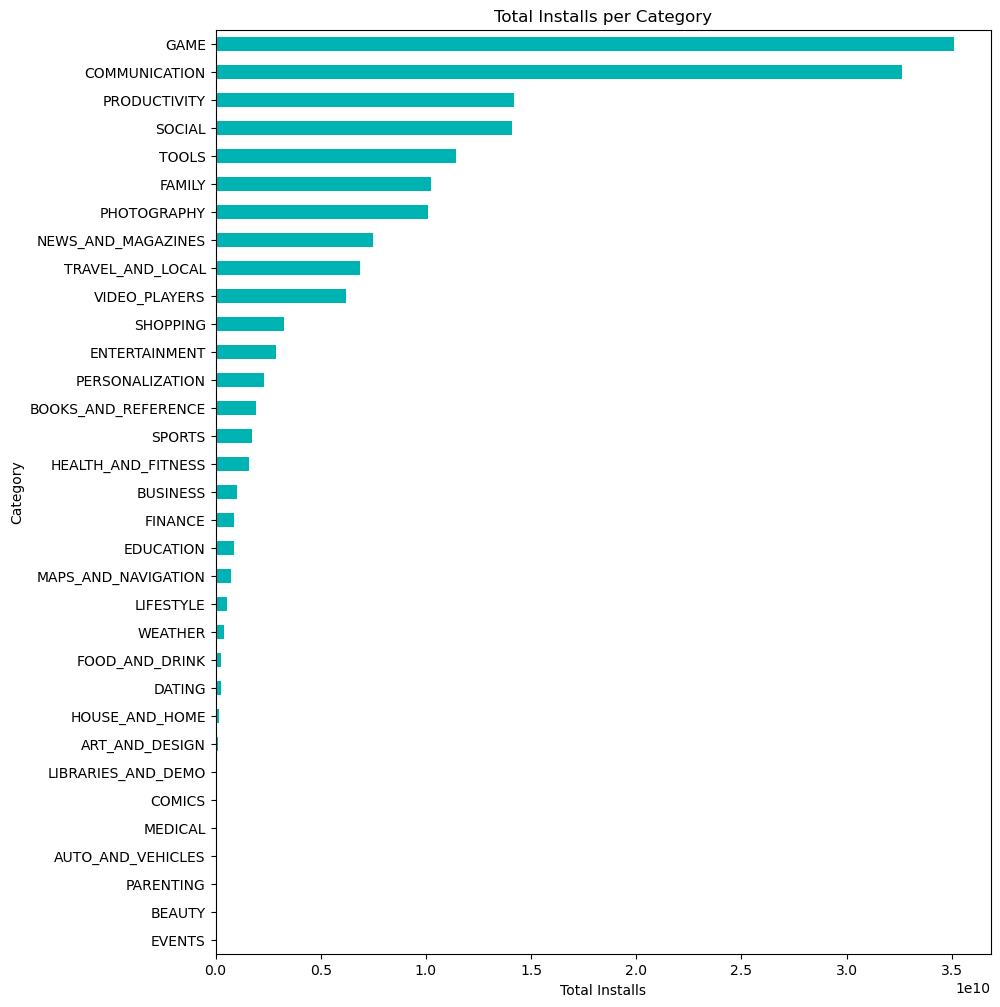

In [25]:
plt.figure(figsize=(10, 12))
df.groupby('Category')['Installs'].sum().sort_values().plot(kind='barh', color='#00b3b3')
plt.title('Total Installs per Category')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.show()


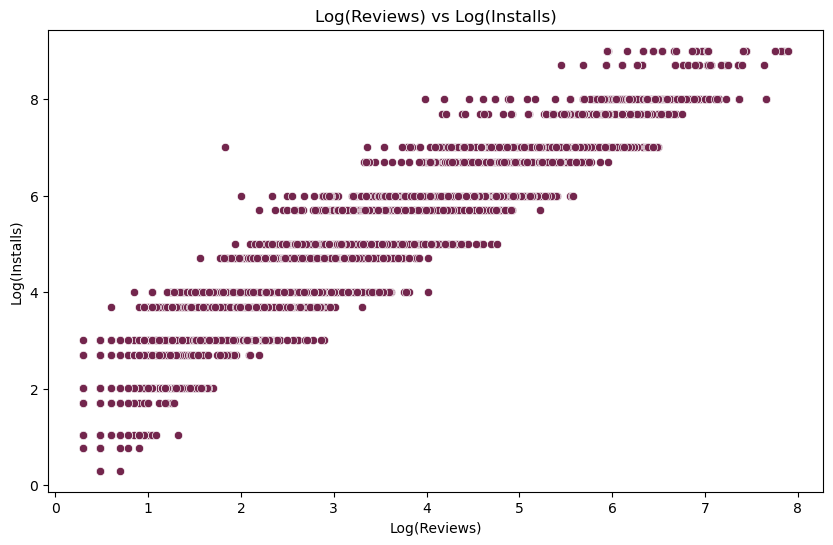

In [34]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log10(df['Reviews'] + 1), y=np.log10(df['Installs'] + 1), color='#73264d')
plt.title('Log(Reviews) vs Log(Installs)')
plt.xlabel('Log(Reviews)')
plt.ylabel('Log(Installs)')
plt.show()


In [38]:
def convert_size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024  # convert kB to MB
        elif 'Varies with device' in size:
            return np.nan
    return np.nan  # in case of unexpected values or missing

df['Size_MB'] = df['Size'].apply(convert_size_to_mb)

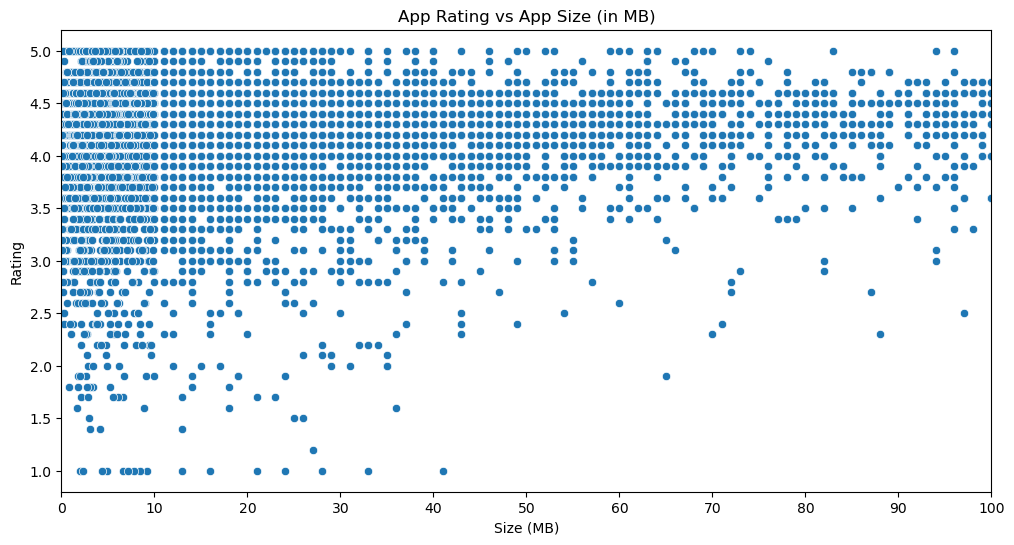

In [42]:
plt.figure(figsize=(12, 6))

# Use Size_MB (already in float) instead of raw 'Size'
sns.scatterplot(x='Size_MB', y='Rating', data=df)

plt.title('App Rating vs App Size (in MB)')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')

# Set x-axis ticks at regular intervals (0 to 100 MB)
plt.xticks(np.arange(0, 110, 10))

# Optional: zoom in to reduce clutter from outliers
plt.xlim(0, 100)

plt.show()

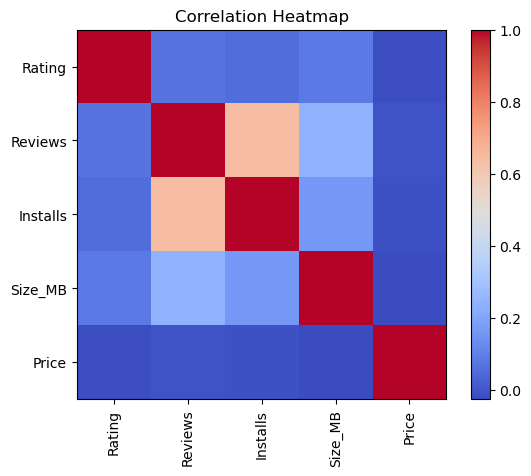

In [43]:
numeric_cols = ['Rating', 'Reviews', 'Installs', 'Size_MB', 'Price']
corr = df[numeric_cols].corr()

plt.imshow(corr, cmap='coolwarm')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.title('Correlation Heatmap')
plt.show()


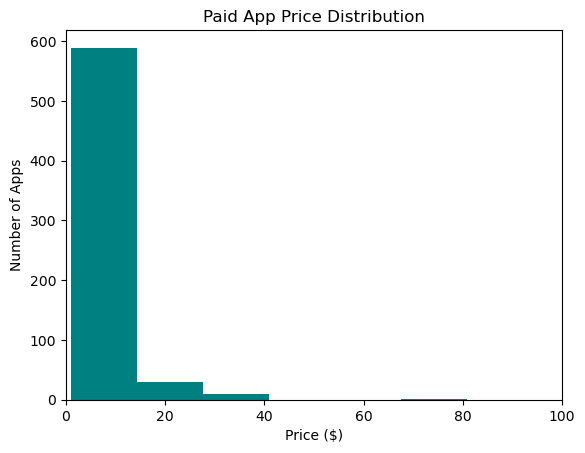

In [44]:
paid_prices = df[df['Price'] > 0]['Price']
plt.hist(paid_prices, bins=30, color='teal')
plt.title('Paid App Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Number of Apps')
plt.xlim(0, 100)
plt.show()


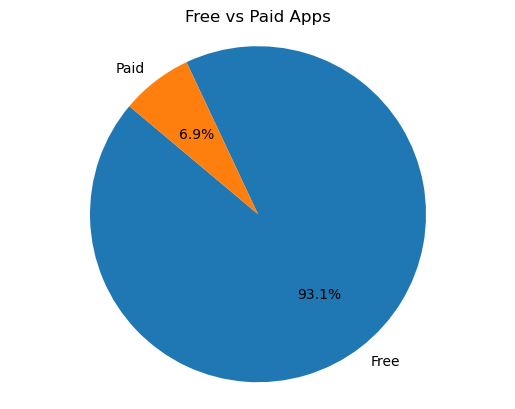

In [45]:
type_counts = df['Type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Free vs Paid Apps')
plt.axis('equal')
plt.show()
